In [1]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 1.8 MB/s eta 0:00:00


In [2]:
import pprint

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import tensorflow_recommenders as tfrs

In [3]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sys
import csv
import gzip
import copy
import datetime
import pickle
from sklearn import metrics
from tabulate import tabulate

In [4]:
seed_value = 42  # seed for reproducibility
random.seed(seed_value)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
sys.path.append('/content/drive/MyDrive/ctr/code/model')

In [7]:
import dcn
import run_models

In [8]:
with open('/content/drive/MyDrive/ctr/data/baseline/fitting_history.V1.0_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [10]:
baseline_history = {
    'train logloss' : fitting_history['Train LogLoss'],
    'train auc' : fitting_history['Train AUC'],
    'test logloss' : fitting_history['Test LogLoss'],
    'test auc' : fitting_history['Test AUC']
}

In [12]:
with open('/content/drive/MyDrive/ctr/data/feature_engineering/fitting_history.V1.2_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [13]:
feature_engineering_history = {
    'train logloss' : fitting_history['Train LogLoss'],
    'train auc' : fitting_history['Train AUC'],
    'test logloss' : fitting_history['Test LogLoss'],
    'test auc' : fitting_history['Test AUC']
}

In [14]:
with open('/content/drive/MyDrive/ctr/data/feature_engineering.rare_count/fitting_history.V1.2_num_0.p', 'rb') as f:
    fitting_history = pickle.load(f)

In [15]:
feature_engineering_history_rare_count = {
    'train logloss' : fitting_history['Train LogLoss'],
    'train auc' : fitting_history['Train AUC'],
    'test logloss' : fitting_history['Test LogLoss'],
    'test auc' : fitting_history['Test AUC']
}

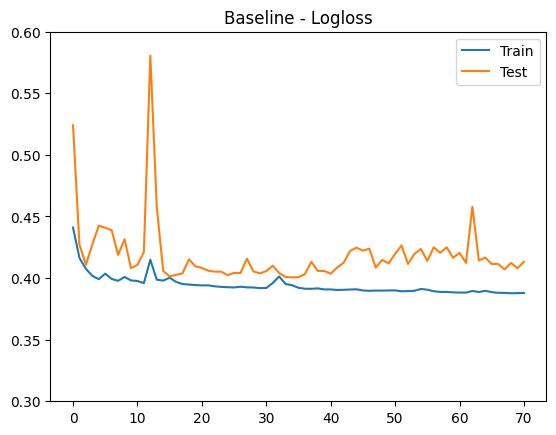

In [18]:
plt.plot(baseline_history['train logloss'], label='Train')
plt.plot(baseline_history['test logloss'], label='Test')
plt.title('Baseline - Logloss')
plt.ylim([0.3, 0.6])
plt.legend(loc='best')
plt.show()

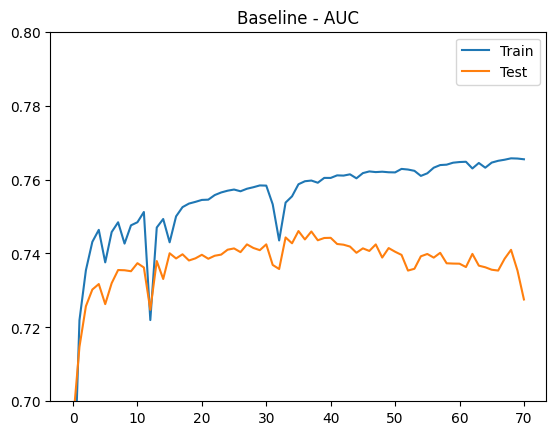

In [23]:
plt.plot(baseline_history['train auc'], label='Train')
plt.plot(baseline_history['test auc'], label='Test')
plt.title('Baseline - AUC')
plt.legend(loc='best')
plt.ylim([0.7, 0.8])
plt.show()

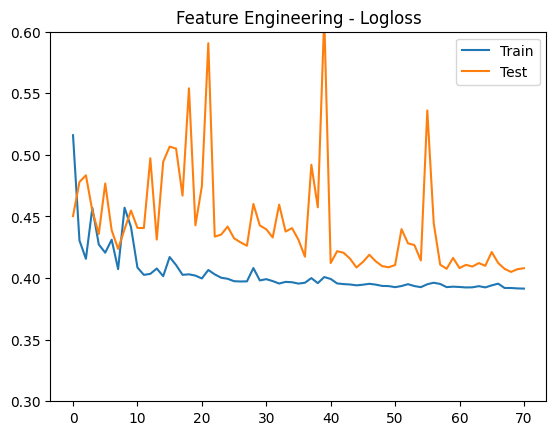

In [34]:
plt.plot(feature_engineering_history['train logloss'], label='Train')
plt.plot(feature_engineering_history['test logloss'], label='Test')
plt.title('Feature Engineering - Logloss')
plt.legend(loc='best')
plt.ylim([0.3, 0.6])
plt.show()

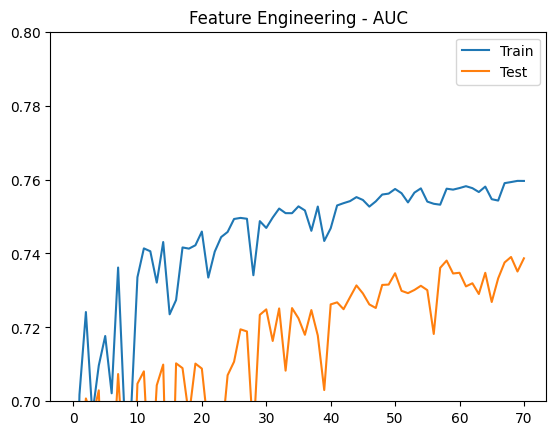

In [35]:
plt.plot(feature_engineering_history['train auc'], label='Train')
plt.plot(feature_engineering_history['test auc'], label='Test')
plt.title('Feature Engineering - AUC')
plt.legend(loc='best')
plt.ylim([0.7, 0.8])
plt.show()

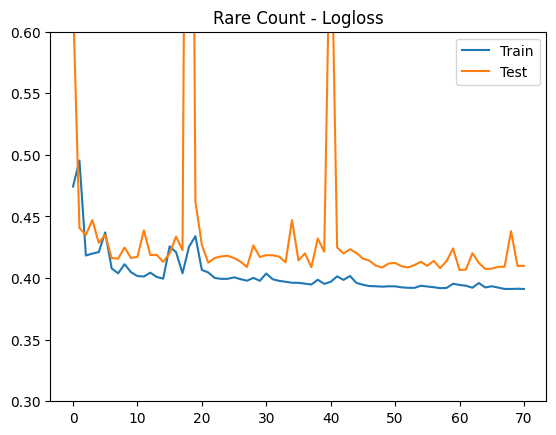

In [36]:
plt.plot(feature_engineering_history_rare_count['train logloss'], label='Train')
plt.plot(feature_engineering_history_rare_count['test logloss'], label='Test')
plt.title('Rare Count - Logloss')
plt.legend(loc='best')
plt.ylim([0.3, 0.6])
plt.show()

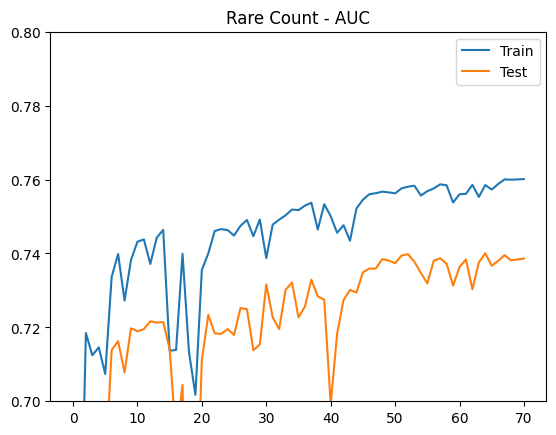

In [38]:
plt.plot(feature_engineering_history_rare_count['train auc'], label='Train')
plt.plot(feature_engineering_history_rare_count['test auc'], label='Test')
plt.title('Rare Count - AUC')
plt.legend(loc='best')
plt.ylim([0.7, 0.8])
plt.show()

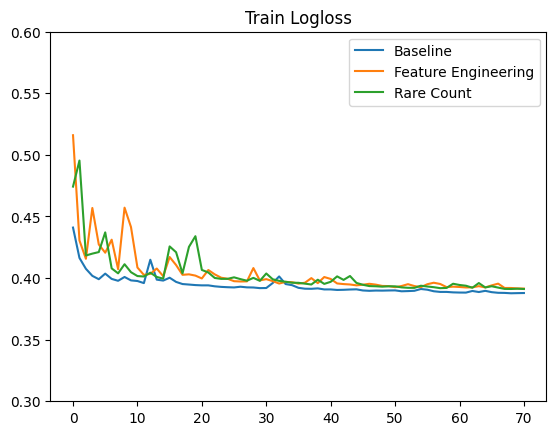

In [28]:
plt.plot(baseline_history['train logloss'], label='Baseline')
plt.plot(feature_engineering_history['train logloss'], label='Feature Engineering')
plt.plot(feature_engineering_history_rare_count['train logloss'], label='Rare Count')
plt.title('Train Logloss')
plt.ylim([0.3, 0.6])
plt.legend(loc='best')
plt.show()

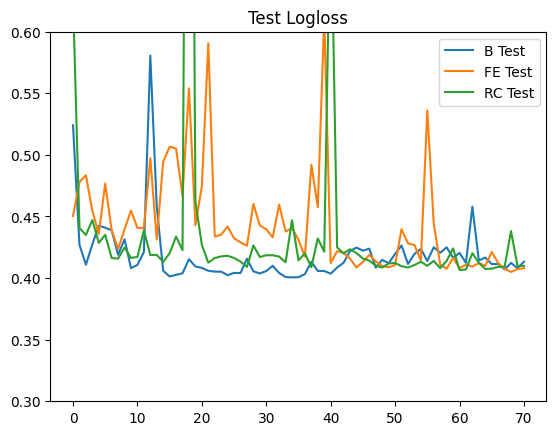

In [29]:
plt.plot(baseline_history['test logloss'], label='Baseline')
plt.plot(feature_engineering_history['test logloss'], label='Feature Engineering')
plt.plot(feature_engineering_history_rare_count['test logloss'], label='Rare Count')
plt.title('Test Logloss')
plt.ylim([0.3, 0.6])
plt.legend(loc='best')
plt.show()

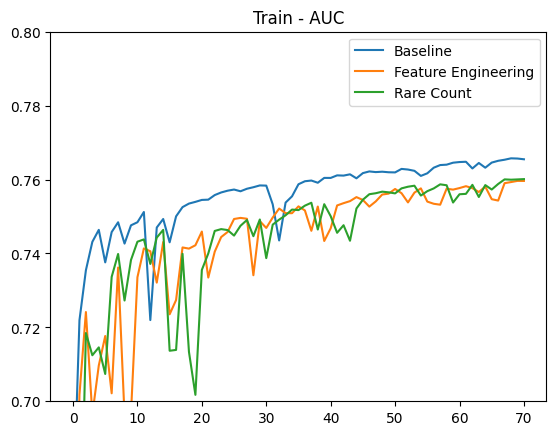

In [32]:
plt.plot(baseline_history['train auc'], label='Baseline')
plt.plot(feature_engineering_history['train auc'], label='Feature Engineering')
plt.plot(feature_engineering_history_rare_count['train auc'], label='Rare Count')
plt.title('Train - AUC')
plt.ylim([0.7, 0.8])
plt.legend(loc='best')
plt.show()

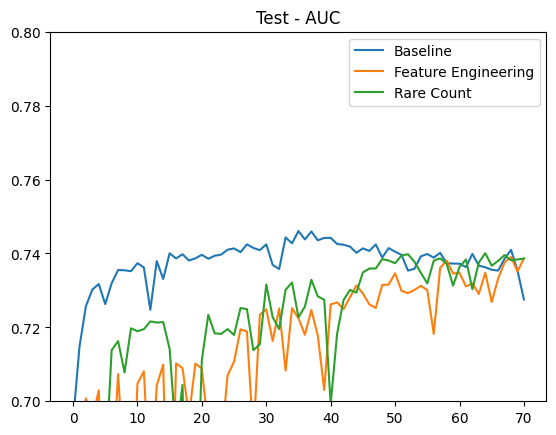

In [33]:
plt.plot(baseline_history['test auc'], label='Baseline')
plt.plot(feature_engineering_history['test auc'], label='Feature Engineering')
plt.plot(feature_engineering_history_rare_count['test auc'], label='Rare Count')
plt.title('Test - AUC')
plt.ylim([0.7, 0.8])
plt.legend(loc='best')
plt.show()